# 🚗 Uber Rides Data Analysis - India NCR Region

## 🎯 Project Overview

- Identify patterns in cancelled and incomplete rides. 
- Determine factors that will lead to a ride completion.
- Analyse the most popular vehicle choices and their relation with ride costs. 
- Understand ride time patterns
- Investigate customers' preferred payment methods 

## 📥 Data Loading and profiling

### Dataset information

The dataset captures 148,770 total bookings across multiple vehicle types and provides a complete view of ride-sharing operations including successful rides, cancellations, customer behaviors, and financial metrics.

##### Data found on kaggle.com:
https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard/data/code/code

#### Importing data and libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import seaborn as sns

df = pd.read_csv("dataset/ncr_ride_bookings.csv")

import warnings
from collections import Counter

df.head()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


Notes: There are many NaN values, which need to be removed or filled in.

In [18]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [20]:
# Checking for missing values
print(df.isna().sum())

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


In [21]:
# Checking for duplicate values
print(df.duplicated().sum())

0


#### Changing column names 
For consistency and easier management

In [22]:
df = df.rename(columns={
    "Booking ID" : "Booking_ID",
    "Booking Status" : "Booking_Status",
    "Customer ID" : "Customer_ID",
    "Vehicle Type" : "Vehicle_Type",
    "Pickup Location" : "Pickup_Location",
    "Drop Location" : "Dropoff_Location",
    "Avg VTAT" : "Avg_VTAT",
    "Avg CTAT" : "Avg_CTAT",
    "Cancelled Rides by Customer" : "Customer_Cancelled_Rides", 
    "Reason for cancelling by Customer" : "Customer_Cancellation_Reason",
    "Cancelled Rides by Driver" : "Driver_Cancelled_Rides",
    "Driver Cancellation Reason" : "Driver_Cancellation_Reason",
    "Incomplete Rides" : "Incomplete_Rides",
    "Incomplete Rides Reason" : "Incomplete_Rides_Reason",
    "Booking Value" : "Booking_Value",
    "Ride Distance" : "Ride_Distance",
    "Driver Ratings" : "Driver_Rating",
    "Customer Rating" : "Customer_Rating",
    "Payment Method" : "Payment_Method"
})

df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Dropoff_Location,Avg_VTAT,Avg_CTAT,...,Customer_Cancellation_Reason,Driver_Cancelled_Rides,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Rating,Customer_Rating,Payment_Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


#### Fixing data types:
Currently all the data have Dtype of either object or float64. The object data should be converted to strings, datetime or categories accordingly, for better and easier data management.

In [23]:
# Change to string 
string_columns = ["Booking_ID", "Customer_ID"]
df[string_columns] = df[string_columns].astype("string")

# Change to datetime format

df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"], format = "%H:%M:%S")

#df["Time"] = df["Time"].drop(df["Time"].dt.date)


# Change to category
category_columns = ["Booking_Status", "Vehicle_Type", "Pickup_Location", "Dropoff_Location", "Customer_Cancellation_Reason", 
                    "Driver_Cancellation_Reason", "Incomplete_Rides_Reason", "Payment_Method"]

df[category_columns] = df[category_columns].astype("category")

# Change to Integer move because nan can't be changed to integer
#int_columns = ["Customer Cancelled Rides", "Driver Cancelled Rides", "Incomplete Rides"]
#df[int_columns] = df[int_columns].astype("int")

df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Dropoff_Location,Avg_VTAT,Avg_CTAT,...,Customer_Cancellation_Reason,Driver_Cancelled_Rides,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Rating,Customer_Rating,Payment_Method
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date                          150000 non-null  datetime64[ns]
 1   Time                          150000 non-null  datetime64[ns]
 2   Booking_ID                    150000 non-null  string        
 3   Booking_Status                150000 non-null  category      
 4   Customer_ID                   150000 non-null  string        
 5   Vehicle_Type                  150000 non-null  category      
 6   Pickup_Location               150000 non-null  category      
 7   Dropoff_Location              150000 non-null  category      
 8   Avg_VTAT                      139500 non-null  float64       
 9   Avg_CTAT                      102000 non-null  float64       
 10  Customer_Cancelled_Rides      10500 non-null   float64       
 11  Customer_Canc

#### Filling values & creating new categories

In [25]:
add_cat_columns = ["Customer_Cancellation_Reason","Driver_Cancellation_Reason", "Incomplete_Rides_Reason", "Payment_Method"]

df[add_cat_columns] = df[add_cat_columns].astype("category")

for item in add_cat_columns:
    df[item] = df[item].cat.add_categories("Unstated")
    df.fillna({item : "Unstated"}, inplace = True)
    print(df[item].cat.categories)
    print(Counter(df[item]))


df.head()

Index(['AC is not working', 'Change of plans', 'Driver asked to cancel',
       'Driver is not moving towards pickup location', 'Wrong Address',
       'Unstated'],
      dtype='object')
Counter({'Unstated': 139500, 'Wrong Address': 2362, 'Change of plans': 2353, 'Driver is not moving towards pickup location': 2335, 'Driver asked to cancel': 2295, 'AC is not working': 1155})
Index(['Customer related issue', 'More than permitted people in there',
       'Personal & Car related issues', 'The customer was coughing/sick',
       'Unstated'],
      dtype='object')
Counter({'Unstated': 123000, 'Customer related issue': 6837, 'The customer was coughing/sick': 6751, 'Personal & Car related issues': 6726, 'More than permitted people in there': 6686})
Index(['Customer Demand', 'Other Issue', 'Vehicle Breakdown', 'Unstated'], dtype='object')
Counter({'Unstated': 141000, 'Customer Demand': 3040, 'Vehicle Breakdown': 3012, 'Other Issue': 2948})
Index(['Cash', 'Credit Card', 'Debit Card', 'UPI', 'Ub

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Dropoff_Location,Avg_VTAT,Avg_CTAT,...,Customer_Cancellation_Reason,Driver_Cancelled_Rides,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Rating,Customer_Rating,Payment_Method
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,Unstated,NaN,Unstated,NaN,Unstated,NaN,NaN,NaN,NaN,Unstated
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Unstated,NaN,Unstated,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Unstated,NaN,Unstated,NaN,Unstated,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Unstated,NaN,Unstated,NaN,Unstated,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Unstated,NaN,Unstated,NaN,Unstated,737.0,48.21,4.1,4.3,UPI


In [26]:
# Filling "0" and "1" in columns and change Dtype to integer: where 0 means No and 1 means Yes

int_columns = ["Customer_Cancelled_Rides", "Driver_Cancelled_Rides", "Incomplete_Rides"]
df[int_columns] = df[int_columns].fillna(0).astype(int)

float_columns = ["Driver_Rating", "Customer_Rating","Ride_Distance", "Booking_Value", "Avg_VTAT", "Avg_CTAT"]
df[float_columns] = df[float_columns].fillna(0).astype(float)

df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Dropoff_Location,Avg_VTAT,Avg_CTAT,...,Customer_Cancellation_Reason,Driver_Cancelled_Rides,Driver_Cancellation_Reason,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Rating,Customer_Rating,Payment_Method
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0.0,0.0,...,Unstated,0,Unstated,0,Unstated,0.0,0.00,0.0,0.0,Unstated
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Unstated,0,Unstated,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Unstated,0,Unstated,0,Unstated,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Unstated,0,Unstated,0,Unstated,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Unstated,0,Unstated,0,Unstated,737.0,48.21,4.1,4.3,UPI


In [27]:
print(df.isna().sum())

Date                            0
Time                            0
Booking_ID                      0
Booking_Status                  0
Customer_ID                     0
Vehicle_Type                    0
Pickup_Location                 0
Dropoff_Location                0
Avg_VTAT                        0
Avg_CTAT                        0
Customer_Cancelled_Rides        0
Customer_Cancellation_Reason    0
Driver_Cancelled_Rides          0
Driver_Cancellation_Reason      0
Incomplete_Rides                0
Incomplete_Rides_Reason         0
Booking_Value                   0
Ride_Distance                   0
Driver_Rating                   0
Customer_Rating                 0
Payment_Method                  0
dtype: int64


#### Checking for duplicates

In [28]:
print(df.duplicated().sum())

0


There are no duplicates so we do not need to drop duplicated rows.

## 📊 Data Visualization

#### 1️⃣ Completed VS Incomplete rides

([<matplotlib.patches.Wedge at 0x185a8a46480>,
 [Text(-0.9097886363331101, -0.6182917088228985, 'Completed'),
  Text(1.0338507313286258, 0.7026042024719648, 'Incomplete')],
 [Text(-0.4962483470907873, -0.3372500229943083, '94.0%'),
  Text(0.6203104387971754, 0.42156252148317885, '6.0%')])

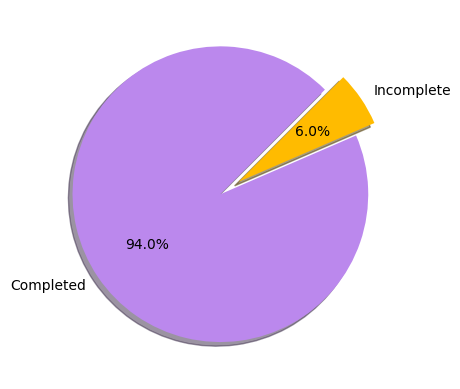

In [29]:
# pie chart of completed vs incomplete rides
count_comp_incomp = df.groupby("Incomplete_Rides").Incomplete_Rides.count().sort_values(ascending=False)
labels=["Completed", "Incomplete"]
colorset_one =["#bb88ed", "#ffbb00"]
colorset_two = ["#34dd9a", "#ff66bc"] 
explode = [0, 0.15]
count_comp_incomp.head()
plt.pie(count_comp_incomp, labels=labels, autopct="%1.1f%%", colors=colorset_one, explode = explode, shadow=True, startangle=45)

##### Analysis:
The majority of rides have been completed successfully.

#### 2️⃣ Complete and Cancelled rides comparison: Driver VS Customer 

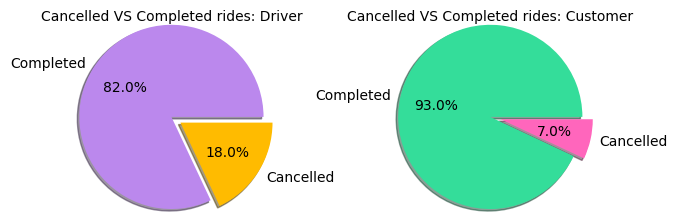

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
labels = ["Completed", "Cancelled"]

driv_cancellations = df.groupby("Driver_Cancelled_Rides").Driver_Cancelled_Rides.count().sort_values(ascending=False)
ax1.pie(driv_cancellations, labels=labels, autopct="%1.1f%%", colors=colorset_one, explode = explode, shadow=True, radius=1.3)
ax1.set_title("Cancelled VS Completed rides: Driver", fontsize=10)

cust_cancellations = df.groupby("Customer_Cancelled_Rides").Customer_Cancelled_Rides.count().sort_values(ascending=False)
ax2.pie(cust_cancellations, labels=labels, autopct="%1.1f%%", colors=colorset_two, explode = explode, shadow=True, radius=1.3)
ax2.set_title("Cancelled VS Completed rides: Customer", fontsize=10)

plt.subplots_adjust(wspace=0.8)


##### Analysis:
Drivers appear to cancel rides more often compared to customers, with drivers cancelling 18% of the time and customers 7% of the time, according to the pie charts.

#### 3️⃣ Reasons for ride cancellation and incompletion

'Customer_Cancellation_Reason' category frequencies
Counter({'Unstated': 139500, 'Wrong Address': 2362, 'Change of plans': 2353, 'Driver is not moving towards pickup location': 2335, 'Driver asked to cancel': 2295, 'AC is not working': 1155})


'Driver_Cancellation_Reason' category frequencies
Counter({'Unstated': 123000, 'Customer related issue': 6837, 'The customer was coughing/sick': 6751, 'Personal & Car related issues': 6726, 'More than permitted people in there': 6686})


'Incomplete_Rides_Reason' category frequencies
Counter({'Unstated': 141000, 'Customer Demand': 3040, 'Vehicle Breakdown': 3012, 'Other Issue': 2948})




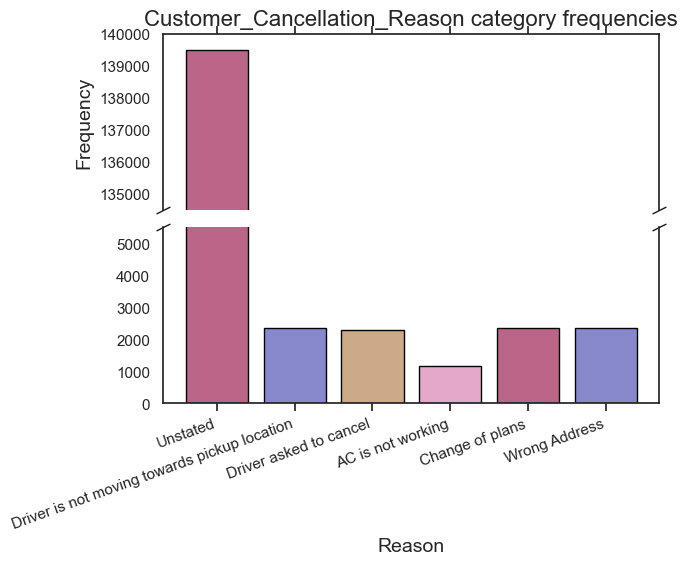

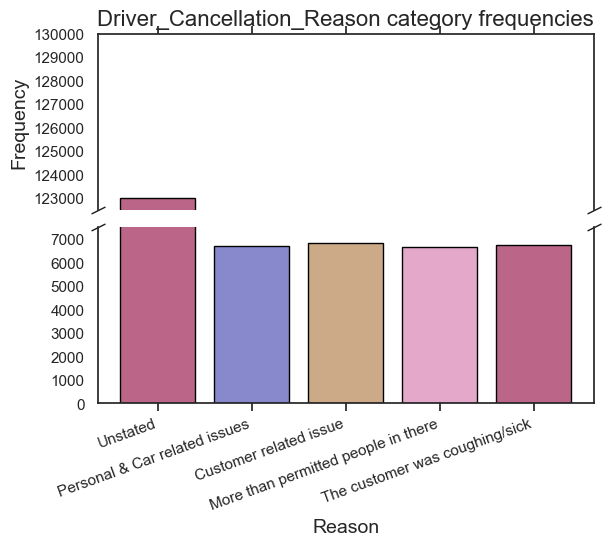

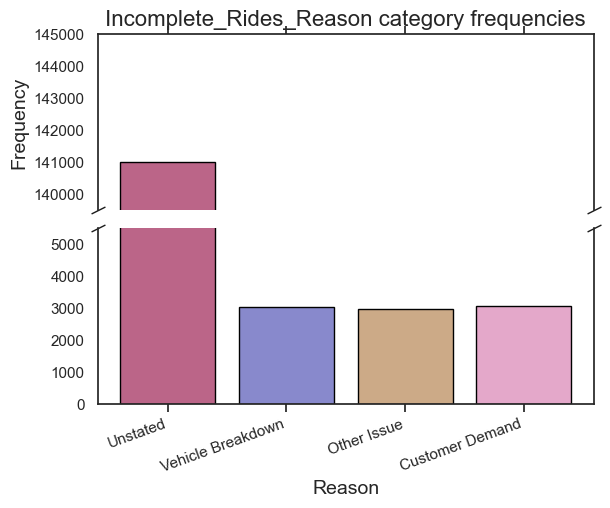

In [31]:
category_freq_cols = ["Customer_Cancellation_Reason", "Driver_Cancellation_Reason", "Incomplete_Rides_Reason"]


# Making a function to create a bar graph with broken axis, which can be reused.

def broken_axis(column, ax2_ylim2, ax1_ylim1, ax1_ylim2):
    sns.set(style="white")
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
    fig.subplots_adjust(hspace=0.1)

    bar_labels = df[item].cat.categories
    bar_colors = ["#bb6588", "#8889cc", "#ccaa87", "#e4a8ca"]
    
    plt.xticks(rotation = 20, ha="right")

    ax1.yaxis.set_major_locator(ticker.MultipleLocator(1000))
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(1000))
    
    ax1.bar(count_freq.keys(), count_freq.values(), edgecolor="black", color=bar_colors)
    ax2.bar(count_freq.keys(), count_freq.values(), edgecolor="black", color=bar_colors)

    ax1.set_ylim(ax1_ylim1, ax1_ylim2)
    ax2.set_ylim(0, ax2_ylim2)

    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.xaxis.tick_top()
    ax2.xaxis.tick_bottom()

    ax1.set_title(column + " category frequencies", fontsize=16)
    ax1.set_ylabel("Frequency", fontsize=14)
    ax2.set_xlabel("Reason", fontsize=14)

    d=0.5
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, mec="k", clip_on=False, linestyle="none")

    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

for column in category_freq_cols:
    print("'" + column + "'" + " category frequencies")
    count_freq = Counter(df[column])
    print(count_freq)
    print("")
    
    if column == "Customer_Cancellation_Reason":
        ax2_ylim2 = 5500 
        ax1_ylim1 = 134500 
        ax1_ylim2 = 140000 
    elif column == "Driver_Cancellation_Reason":
        ax2_ylim2 = 7500
        ax1_ylim1 = 122500
        ax1_ylim2 = 130000
    elif column == "Incomplete_Rides_Reason":
        ax2_ylim2 = 5500 
        ax1_ylim1 = 139500
        ax1_ylim2 = 145000 
        
    print("")
    broken_axis(column, ax2_ylim2, ax1_ylim1, ax1_ylim2)


##### Analysis:
From the categorical bar graphs:
- the most common customer cancellation reason (which was stated) was **Wrong Address**
- the most common driver cancellation reason (which was stated) was **Customer related issue**
- the most common incomplete ride reason (which was stated) was **Customer demand**

#### 4️⃣ Relations between ratings and successful ride completion

<Axes: xlabel='Customer_Rating'>

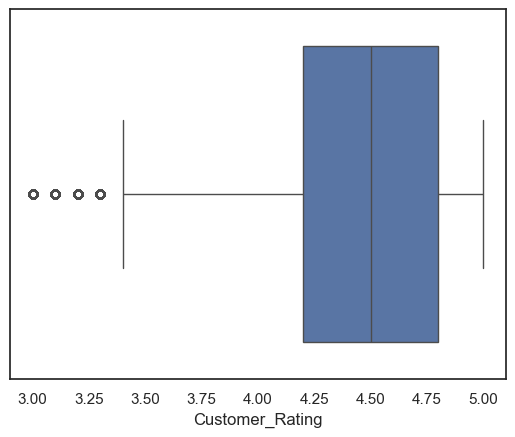

In [32]:
completed_ride = df[df["Booking_Status"] == "Completed"]
sns.boxplot(data=completed_ride, x="Customer_Rating", orient="h")

<Axes: xlabel='Driver_Rating'>

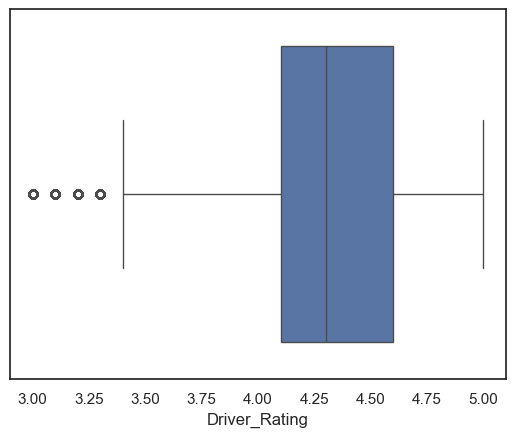

In [33]:
sns.boxplot(data=completed_ride, x="Driver_Rating", orient="h")

##### Analysis:
The first graph shows that the rides which have a "Completed" booking status tend to have customers with a rating above 3. The majority of customers with a successfully completed ride have a rating above 4.
The graph is left skewed, with the interquartile range being relatively even.

For the second graph, rides which have a "Completed" booking status tend to have drivers with a rating above 3, mostly around the 4.1 to 4.65 range.
This graph is slightly left skewed.

#### 5️⃣ Relation between CTAT and Customer Rating, VTAT and Driver Rating

<Axes: xlabel='Customer_Rating', ylabel='Avg_CTAT'>

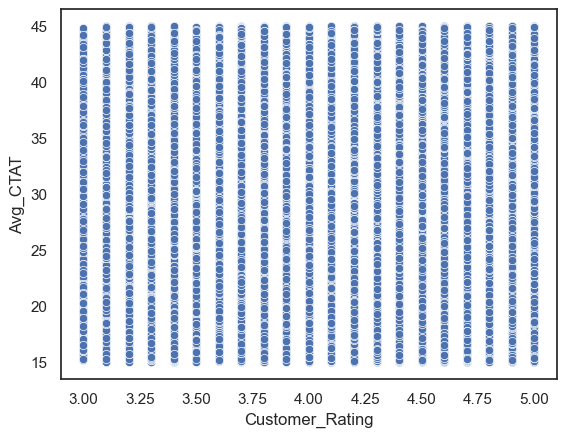

In [34]:
cust_rating_not_zero = df[df["Customer_Rating"] != 0]
sns.scatterplot(data=cust_rating_not_zero, x="Customer_Rating", y="Avg_CTAT")

<Axes: xlabel='Driver_Rating', ylabel='Avg_VTAT'>

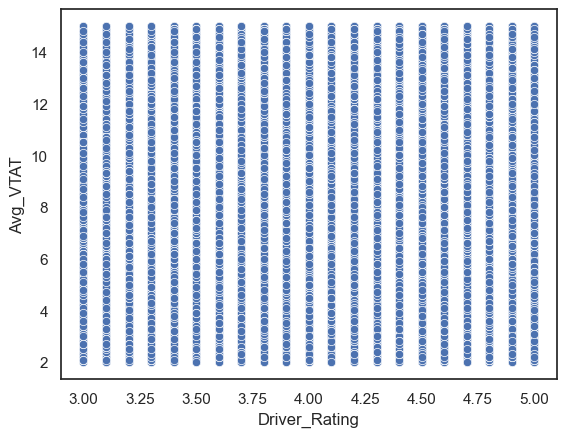

In [35]:
driv_rating_not_zero = df[df["Driver_Rating"] != 0]
sns.scatterplot(data=driv_rating_not_zero, x="Driver_Rating", y="Avg_VTAT")

##### Analysis: 
There appears to be no direct correlation between Average VTAT and driver rating, and between Average CTAT and customer rating.

#### 6️⃣ Average VTAT and CTAT effect on Booking Status

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Cancelled by Customer'),
  Text(1, 0, 'Cancelled by Driver'),
  Text(2, 0, 'Completed'),
  Text(3, 0, 'Incomplete'),
  Text(4, 0, 'No Driver Found')])

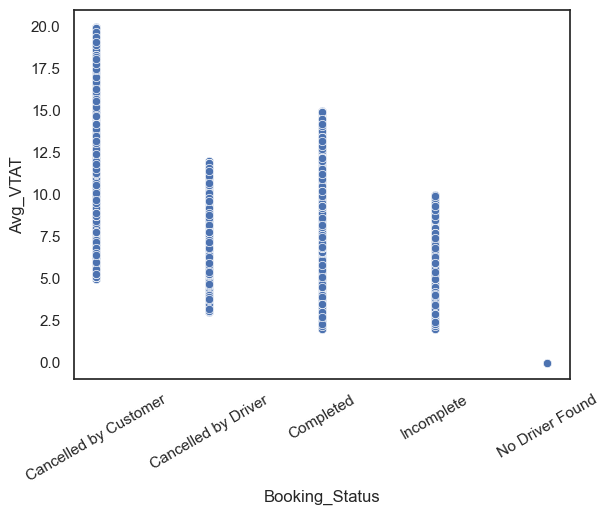

In [36]:
sns.scatterplot(data=df, x="Booking_Status", y="Avg_VTAT")
plt.xticks(rotation=30)

##### Analysis: 
There were many customer cancellations when there was a high Average VTAT (Vehicle turn-around time). 
This may be because if the driver took too long to arrive at pickup, it could cause ride to be cancelled by customer.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Cancelled by Customer'),
  Text(1, 0, 'Cancelled by Driver'),
  Text(2, 0, 'Completed'),
  Text(3, 0, 'Incomplete'),
  Text(4, 0, 'No Driver Found')])

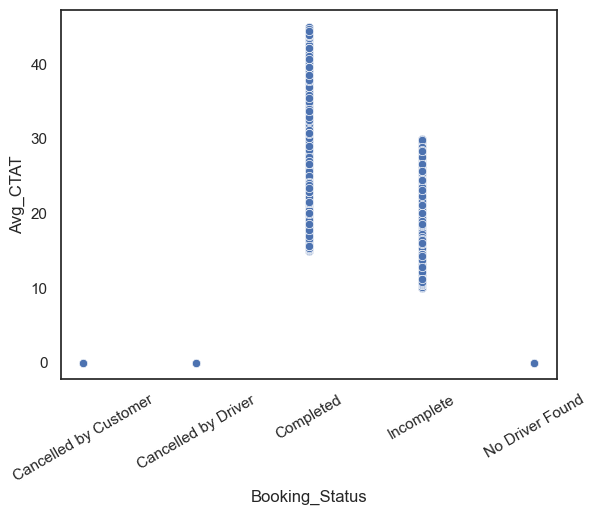

In [37]:
sns.scatterplot(data=df, x="Booking_Status", y="Avg_CTAT")
plt.xticks(rotation=30)

##### Analysis:
The customer turnaround time didn't seem to impact cancellations by customer or driver. (No correlation)

#### 7️⃣ Vehicle type in relation to Booking Value

Vehicle_Type
Uber XL           1528032.0
eBike             3618485.0
Premier Sedan     6275332.0
Bike              7837697.0
Go Sedan          9369719.0
Go Mini          10338496.0
Auto             12878422.0
Name: Booking_Value, dtype: float64


Text(0.5, 1.0, 'Booking Value Totals by Vehicle Type')

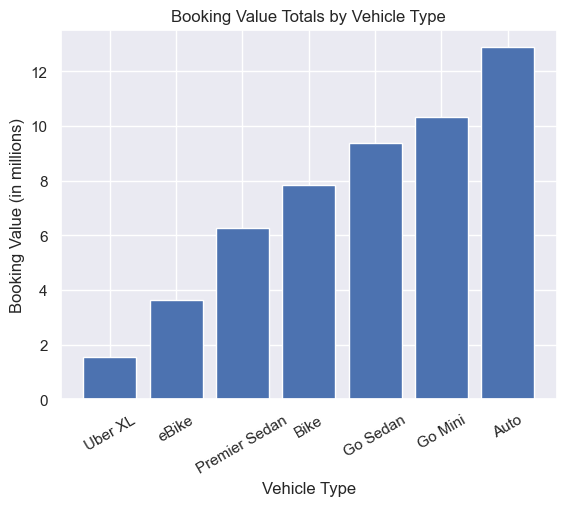

In [38]:
import seaborn as sns

booking_sum_by_vehicle = df.groupby("Vehicle_Type", observed=True).Booking_Value.sum().sort_values()
print(booking_sum_by_vehicle)
sns.set(style="darkgrid")
plt.bar(booking_sum_by_vehicle.index, booking_sum_by_vehicle.values/1000000)
plt.xticks(rotation=30)
plt.xlabel("Vehicle Type")
plt.ylabel("Booking Value (in millions)")
plt.title("Booking Value Totals by Vehicle Type")


##### Analysis:
Uber rides with Auto vehicles generate the largest total booking value, which suggests Auto vehicles are the most popular in vehicle choice.

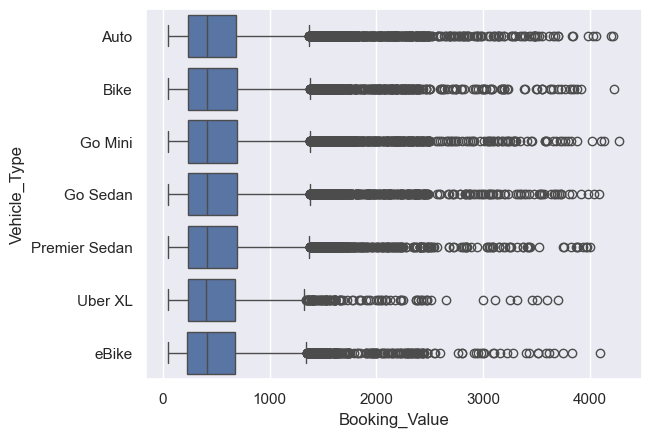

In [39]:
#color_palette = ["#ffbb00", "#ff66bb", "#33dd99", "#bb88ee"]

booking_value_drop_nil = df[df["Booking_Value"]!= 0]
sns.boxplot(x="Booking_Value", y="Vehicle_Type", data=booking_value_drop_nil
            #palette=color_palette, hue = "Vehicle_Type", legend=False); 
           );
sns.set(style="darkgrid")


##### Analysis:
All of these graphs are right skewed, meaning that most of the data is on the lower end of the scale. The lower 75% (from the minimum to the upper quartile) of booking values are under 1000, suggesting that uber booking values tend to be under 1000 Rupees. 

Vehicle_Type
Auto             344.167990
Bike             348.079096
Go Mini          346.859558
Go Sedan         345.223794
Premier Sedan    346.492850
Uber XL          343.455158
eBike            342.756939
Name: Booking_Value, dtype: float64


Text(0.5, 1.0, 'Mean Booking Value by Vehicle Type')

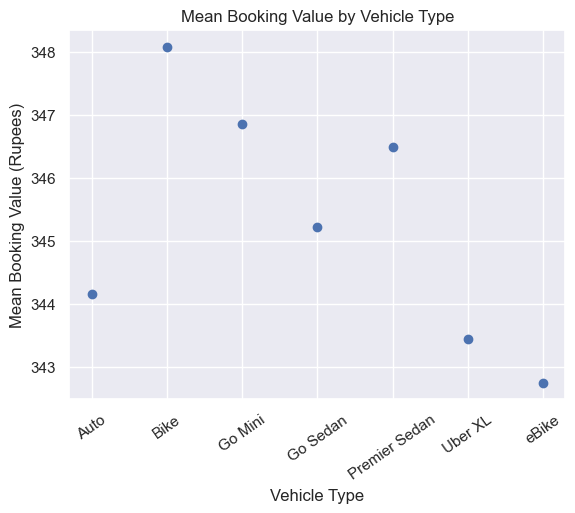

In [40]:
booking_mean_by_vehicle = df.groupby("Vehicle_Type", observed=True).Booking_Value.mean()
print(booking_mean_by_vehicle)
plt.scatter(df["Vehicle_Type"].cat.categories, booking_mean_by_vehicle)
plt.xticks(rotation=35)
plt.xlabel("Vehicle Type")
plt.ylabel("Mean Booking Value (Rupees)")
plt.title("Mean Booking Value by Vehicle Type")

##### Analysis:
Bike uber rides had the highest mean Booking Value at 348.07 rupees, while eBikes had the lowest mean value at 342.76 rupees. However, the means booking values for all vehicles are very similar. 

#### 8️⃣ Ride Counts and Booking Value totals by hour of day

<Axes: xlabel='Time (by hour)', ylabel='Count'>

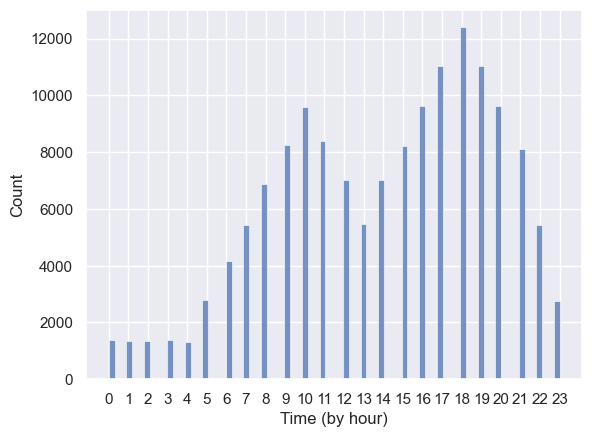

In [41]:
hour = df["Time"].dt.hour

plt.xlabel("Time (by hour)")
plt.xticks(np.arange(0 ,24, 1))

sns.histplot(data=df, x=hour)


[ 477304.  467167.  475840.  469813.  454992.  930721. 1471059. 1851902.
 2394391. 2891944. 3342593. 2905343. 2424257. 1858436. 2389385. 2818707.
 3323600. 3857680. 4268079. 3714520. 3339546. 2887604. 1857020.  974280.]


([<matplotlib.axis.XTick at 0x185b0222630>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

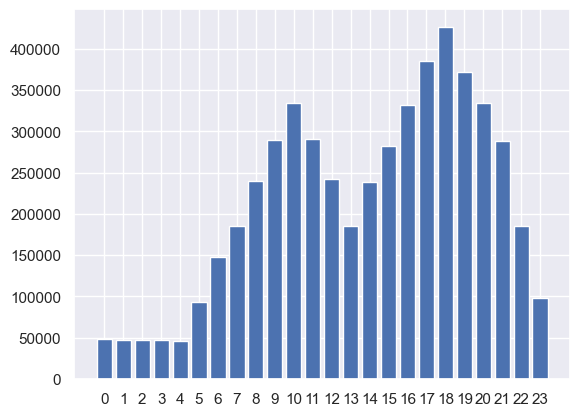

In [42]:
booking_value_total_by_hour = df.groupby(hour, observed=True).Booking_Value.sum()
print(booking_value_total_by_hour.values)
plt.bar(booking_value_total_by_hour.index, booking_value_total_by_hour.values/10)
plt.xticks(np.arange(0 ,24, 1))

##### Analysis:
These graphs have bimodal shapes. 
Ride numbers and Booking Value totals by hour of day peak at two points: 10 and 18 (representing 10AM and 6PM). This could be because work hours in the region typically start at 10AM and end at 6PM.

#### 9️⃣ Preferred Payment Methods

([0, 1, 2, 3, 4],
 [Text(0, 0, 'UPI'),
  Text(1, 0, 'Debit Card'),
  Text(2, 0, 'Cash'),
  Text(3, 0, 'Uber Wallet'),
  Text(4, 0, 'Credit Card')])

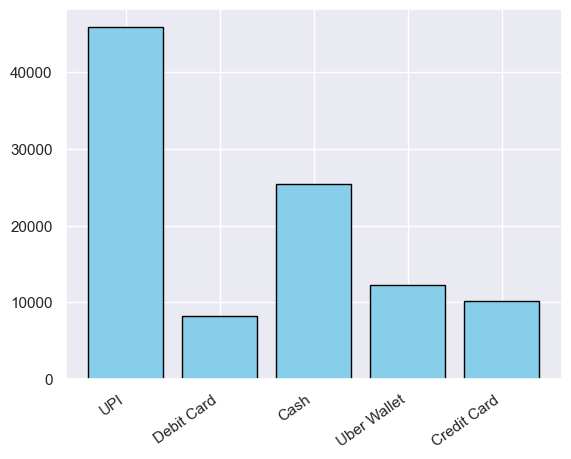

In [43]:
payment_drop_unstated = df[df["Payment_Method"] != "Unstated"]
payment_freq = Counter(payment_drop_unstated["Payment_Method"])
plt.bar(payment_freq.keys(), payment_freq.values(), edgecolor="black", color="skyblue")
plt.xticks(rotation=35, ha="right")

##### Analysis: 
According to the bar graph, UPI (Unified Payments Interface) payments have the highest frequency. This suggests that digital payments are more popular compared to cash or card.

## 📝 Conclusion

##### The results of this analysis show:
- 6% of uber rides in the NCR were cancelled
- Drivers were more likely to cancel
- The majority of cancellations were due to a wrong address or customer related issues
- Most incompletions were caused by Customer demand
- Customer and Driver ratings were usually high (around 4)
- No direct correlation between customer cancellations and VTAT, or driver cancellations and CTAT
- Most common vehicle type: Auto
- Uber ride frequencies peak at 10AM and 6PM.
- The total booking values by hour are greatest at 10AM and 6PM, at 3342593 and 4268079 rupees respectively.
- Best preferred payment method: UPI



Project made by Audrey S

**Contact**: audrey.shi108@gmail.com